In [ ]:
# install rdkit  
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y -c rdkit rdkit python=3.7
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import pprint     
pprint.pprint(sys.path)
!python -c "import site; print (site.getsitepackages())"

In [3]:
import pandas as pd
df = pd.read_csv('top_70_MOAs.txt', sep = '\t')
df

,SMILES,MOA
0,Oc1ccc(CCNCC2CCc3ccccc3C2=O)cc1,adrenergic receptor antagonist
1,OC(CNCCNC(=O)Nc1ccccc1)COc1ccccc1C#N,adrenergic receptor antagonist
2,O=C1Nc2ccccc2C2=NC(CN3CCN(CC3)c3ccccc3)CN12,adrenergic receptor antagonist
3,O=C(NC1CCN(CCc2c[nH]c3ccccc23)CC1)c1ccccc1,adrenergic receptor antagonist
4,O[C@H](CNC[C@@H](O)[C@@H]1CCc2cc(F)ccc2O1)[C@H...,adrenergic receptor antagonist
...,...,...
2312,CCn1c(nc2c(ncc(OC[C@H]3CCCNC3)c12)C#CC(C)(C)O)...,AKT inhibitor
2313,CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12,AKT inhibitor
2314,CCCCCCCCCCCCCCCCCCOP(O)(=O)OC1CC[N+](C)(C)CC1,AKT inhibitor
2315,Cc1n[nH]c2ccc(cc12)-c1cncc(OC[C@@H](N)Cc2ccccc...,AKT inhibitor


In [4]:
# check the duplicates 
for i in df.SMILES.tolist():
  if df.SMILES.tolist().count(i) != 1:
    print(i)

In [14]:
MOA_class_dictionary = {'AKT inhibitor': 4,
 'ATPase inhibitor': 56,
 'Aurora kinase inhibitor': 16,
 'CC chemokine receptor antagonist': 33,
 'CDK inhibitor': 18,
 'DNA inhibitor': 63,
 'DNA synthesis inhibitor': 26,
 'EGFR inhibitor': 53,
 'GABA receptor antagonist': 49,
 'HCV inhibitor': 0,
 'HDAC inhibitor': 22,
 'HSP inhibitor': 6,
 'JAK inhibitor': 27,
 'MEK inhibitor': 37,
 'NFkB pathway inhibitor': 3,
 'PARP inhibitor': 43,
 'PI3K inhibitor': 51,
 'PPAR receptor agonist': 58,
 'acetylcholine receptor agonist': 44,
 'acetylcholine receptor antagonist': 36,
 'acetylcholinesterase inhibitor': 19,
 'adenosine receptor agonist': 45,
 'adenosine receptor antagonist': 65,
 'adrenergic receptor agonist': 69,
 'adrenergic receptor antagonist': 15,
 'angiotensin converting enzyme inhibitor': 8,
 'antioxidant': 10,
 'apoptosis stimulant': 20,
 'bacterial 30S ribosomal subunit inhibitor': 13,
 'bacterial 50S ribosomal subunit inhibitor': 17,
 'bacterial DNA gyrase inhibitor': 31,
 'bacterial cell wall synthesis inhibitor': 30,
 'benzodiazepine receptor agonist': 57,
 'bromodomain inhibitor': 59,
 'calcium channel blocker': 35,
 'carbonic anhydrase inhibitor': 50,
 'cyclooxygenase inhibitor': 47,
 'cytochrome P450 inhibitor': 12,
 'dopamine receptor agonist': 54,
 'dopamine receptor antagonist': 14,
 'tachykinin antagonist': 28,
 'estrogen receptor agonist': 52,
 'glucocorticoid receptor agonist': 29,
 'glutamate receptor agonist': 9,
 'glutamate receptor antagonist': 34,
 'histamine receptor agonist': 39,
 'histamine receptor antagonist': 23,
 'histone lysine methyltransferase inhibitor': 21,
 'local anesthetic': 41,
 'mTOR inhibitor': 62,
 'monoamine oxidase inhibitor': 42,
 'nitric oxide synthase inhibitor': 66,
 'opioid receptor agonist': 40,
 'opioid receptor antagonist': 55,
 'p38 MAPK inhibitor': 11,
 'phosphodiesterase inhibitor': 46,
 'potassium channel activator': 1,
 'potassium channel blocker': 68,
 'progesterone receptor agonist': 67,
 'prostanoid receptor antagonist': 48,
 'protein synthesis inhibitor': 25,
 'purinergic receptor antagonist': 61,
 'radiopaque medium': 5,
 'retinoid receptor agonist': 60,
 'rho associated kinase inhibitor': 2,
 'serotonin receptor agonist': 7,
 'serotonin receptor antagonist': 32,
 'sodium channel blocker': 38,
 'topoisomerase inhibitor': 64,
 'tubulin polymerization inhibitor': 24}  

In [15]:
sorted_classes = list(MOA_class_dictionary.values())
sorted_classes.sort() 
assert sorted_classes == [i for i in range(70)]

In [11]:
# add classes column 
df['classes'] = None
for i in range(df.shape[0]):
  df.iloc[i,2] = MOA_class_dictionary[df.iloc[i,1]]
df

,SMILES,MOA,classes
0,Oc1ccc(CCNCC2CCc3ccccc3C2=O)cc1,adrenergic receptor antagonist,15
1,OC(CNCCNC(=O)Nc1ccccc1)COc1ccccc1C#N,adrenergic receptor antagonist,15
2,O=C1Nc2ccccc2C2=NC(CN3CCN(CC3)c3ccccc3)CN12,adrenergic receptor antagonist,15
3,O=C(NC1CCN(CCc2c[nH]c3ccccc23)CC1)c1ccccc1,adrenergic receptor antagonist,15
4,O[C@H](CNC[C@@H](O)[C@@H]1CCc2cc(F)ccc2O1)[C@H...,adrenergic receptor antagonist,15
...,...,...,...
2312,CCn1c(nc2c(ncc(OC[C@H]3CCCNC3)c12)C#CC(C)(C)O)...,AKT inhibitor,4
2313,CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12,AKT inhibitor,4
2314,CCCCCCCCCCCCCCCCCCOP(O)(=O)OC1CC[N+](C)(C)CC1,AKT inhibitor,4
2315,Cc1n[nH]c2ccc(cc12)-c1cncc(OC[C@@H](N)Cc2ccccc...,AKT inhibitor,4


In [16]:
# A function that changes smiles string to fingerprints 
import rdkit
import numpy as np
from rdkit import *
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
def smiles_to_array_to_string(smiles):
  molecules = Chem.MolFromSmiles(smiles) 
  fingerprints = AllChem.GetMorganFingerprintAsBitVect(molecules, 2)
  x_array = []
  arrays  = np.zeros(0,)
  DataStructs.ConvertToNumpyArray(fingerprints, arrays)
  x_array.append(arrays)
  x_array = np.asarray(x_array)
  x_array = list((np.squeeze(x_array)).astype(int))
  string = ''
  for i in x_array:
    string += str(i) 
  return string

In [17]:
# Check the existence of Isomers
assert len(set([smiles_to_array_to_string(i) for i in df.SMILES.tolist()])) == df.shape[0]

In [18]:
df.head(3)

,SMILES,MOA,classes
0,Oc1ccc(CCNCC2CCc3ccccc3C2=O)cc1,adrenergic receptor antagonist,15
1,OC(CNCCNC(=O)Nc1ccccc1)COc1ccccc1C#N,adrenergic receptor antagonist,15
2,O=C1Nc2ccccc2C2=NC(CN3CCN(CC3)c3ccccc3)CN12,adrenergic receptor antagonist,15


In [19]:
# Split out the test set  
from sklearn.model_selection import train_test_split
x_train_valid, x_test, y_train_valid, y_test = train_test_split(df.SMILES, df.classes, test_size =10/100,
 stratify = df.classes, shuffle = True, random_state = 1000)

In [20]:
# kfold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 9)
skf.get_n_splits(np.array(list(x_train_valid)), np.array(list(y_train_valid)))
train_index_list = []
valid_index_list = []
for train_index, valid_index in skf.split(np.array(list(x_train_valid)), np.array(list(y_train_valid))):
  train_index_list.append(train_index)
  valid_index_list.append(valid_index)

In [21]:
a_list = []
for i in range(9):
  a_list += list(np.array(list(x_train_valid))[valid_index_list[i]])

In [22]:
number_of_kfold = 0 # change the number from 0-8 to get 9 shuffles

In [23]:
  x_train = list(np.array(list(x_train_valid))[train_index_list[ number_of_kfold ]])
  x_valid = list(np.array(list(x_train_valid))[valid_index_list[ number_of_kfold ]])
  y_train = list(np.array(list(y_train_valid))[train_index_list[ number_of_kfold ]])
  y_valid = list(np.array(list(y_train_valid))[valid_index_list[ number_of_kfold ]])
  x_test = list(x_test)
  y_test = list(y_test)

In [24]:
# turn to cannoical  smiles
x_train = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_train]
x_valid = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_valid]
x_test = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_test]

In [25]:
def smiles_to_array(smiles):
  molecules = Chem.MolFromSmiles(smiles) 
  fingerprints = AllChem.GetMorganFingerprintAsBitVect(molecules, 2)
  x_array = []
  arrays = np.zeros(0,)
  DataStructs.ConvertToNumpyArray(fingerprints, arrays)
  x_array.append(arrays)
  x_array = np.asarray(x_array)
  x_array = ((np.squeeze(x_array)).astype(int)) 
  return x_array

In [28]:
train_x = np.zeros((len(x_train), 2048), dtype = np.float32)
for f in range(train_x.shape[0]):
  train_x[f] = smiles_to_array(x_train[f])

In [29]:
valid_x = np.zeros((len(x_valid), 2048), dtype = np.float32)
for f in range(valid_x.shape[0]):
  valid_x[f] = smiles_to_array(x_valid[f])

In [30]:
test_x = np.zeros((len(x_test), 2048), dtype = np.float32)
for f in range(test_x.shape[0]):
  test_x[f] = smiles_to_array(x_test[f])

In [31]:
# Check if there are overlaps
overlap = []
for i in range(train_x.shape[0]):
  for j in range(valid_x.shape[0]):
    if np.array_equal(train_x[i], valid_x[j]) == True:
      overlap.append((i,j))
      print(i,j)

In [32]:
for i in range(test_x.shape[0]):
  for j in range(valid_x.shape[0]):
    if np.array_equal(test_x[i], valid_x[j]) == True:
      overlap.append((i,j))
      print(i,j)

In [33]:
for i in range(train_x.shape[0]):
  for j in range(test_x.shape[0]):
    if np.array_equal(train_x[i], test_x[j]) == True:
      overlap.append((i,j))
      print(i,j)

In [34]:
assert len(overlap) == 0

In [35]:
y_train = np.array(y_train).astype(int)
y_valid = np.array(y_valid).astype(int)
y_test = np.array(y_test).astype(int)

In [36]:
import gc               
gc.collect() 

477

In [37]:
# Create class weights
from sklearn.utils import class_weight
y_unique = np.unique(np.array(y_train))
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = y_unique,
                y = np.array(y_train)) 
class_weights_dict45 = dict(enumerate(class_weights))
class_weights_dict45

{0: 1.6544642857142857,
 1: 2.205952380952381,
 2: 2.205952380952381,
 3: 1.8908163265306122,
 4: 2.036263736263736,
 5: 2.205952380952381,
 6: 1.393233082706767,
 7: 0.5402332361516035,
 8: 1.4706349206349207,
 9: 1.3235714285714286,
 10: 1.5571428571428572,
 11: 1.7647619047619048,
 12: 1.4706349206349207,
 13: 1.4706349206349207,
 14: 0.5190476190476191,
 15: 0.34830827067669173,
 16: 1.5571428571428572,
 17: 1.8908163265306122,
 18: 0.9804232804232804,
 19: 1.3235714285714286,
 20: 2.205952380952381,
 21: 1.260544217687075,
 22: 0.8539170506912442,
 23: 0.47270408163265304,
 24: 1.393233082706767,
 25: 0.9454081632653061,
 26: 1.260544217687075,
 27: 1.4706349206349207,
 28: 2.205952380952381,
 29: 0.7154440154440155,
 30: 0.35295238095238096,
 31: 1.058857142857143,
 32: 0.4812987012987013,
 33: 1.1509316770186335,
 34: 0.4411904761904762,
 35: 0.7154440154440155,
 36: 0.4010822510822511,
 37: 1.5571428571428572,
 38: 0.8539170506912442,
 39: 2.205952380952381,
 40: 1.393233082706

In [38]:
# The architecture of model      
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout
num = len(set(df.MOA.tolist()))
input1 = Input(shape=(train_x.shape[1],))
layer = Dense(64, activation='relu')(input1)
layer = Dropout(0.8)(layer)
layer = Dense(num, activation='softmax')(layer)
model1 = Model(inputs = input1, outputs = layer)

In [39]:
from keras.callbacks import ModelCheckpoint
filepath_mlp = '/content/'+'MLP_70_MOA_weights.hdf5'
checkpoint_mlp = ModelCheckpoint(filepath_mlp, monitor='val_accuracy', verbose=0, save_best_only = True,
                mode = 'max')

In [40]:
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ['accuracy'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=25, verbose=0, mode='min')  
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                  factor=0.1, patience=7, verbose=0, min_delta=1e-119, mode='min')
history = model1.fit(train_x, y_train, validation_data=(valid_x, y_valid), class_weight=class_weights_dict45,
            shuffle=True, verbose=2, epochs=1800, batch_size=64,
            callbacks=[earlyStopping, checkpoint_mlp, reduce_lr_loss])

Epoch 1/1800


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 - 3s - loss: 4.3102 - accuracy: 0.0146 - val_loss: 4.2656 - val_accuracy: 0.0172 - lr: 1.0000e-04 - 3s/epoch - 102ms/step
Epoch 2/1800
29/29 - 0s - loss: 4.2886 - accuracy: 0.0194 - val_loss: 4.2544 - val_accuracy: 0.0172 - lr: 1.0000e-04 - 79ms/epoch - 3ms/step
Epoch 3/1800
29/29 - 0s - loss: 4.2689 - accuracy: 0.0140 - val_loss: 4.2446 - val_accuracy: 0.0216 - lr: 1.0000e-04 - 95ms/epoch - 3ms/step
Epoch 4/1800
29/29 - 0s - loss: 4.2657 - accuracy: 0.0151 - val_loss: 4.2352 - val_accuracy: 0.0302 - lr: 1.0000e-04 - 96ms/epoch - 3ms/step
Epoch 5/1800
29/29 - 0s - loss: 4.2392 - accuracy: 0.0221 - val_loss: 4.2262 - val_accuracy: 0.0388 - lr: 1.0000e-04 - 97ms/epoch - 3ms/step
Epoch 6/1800
29/29 - 0s - loss: 4.2151 - accuracy: 0.0200 - val_loss: 4.2180 - val_accuracy: 0.0560 - lr: 1.0000e-04 - 98ms/epoch - 3ms/step
Epoch 7/1800
29/29 - 0s - loss: 4.2043 - accuracy: 0.0243 - val_loss: 4.2096 - val_accuracy: 0.0647 - lr: 1.0000e-04 - 95ms/epoch - 3ms/step
Epoch 8/1800
29/29 - 0s - 

In [42]:
# Load the best model
from keras.models import load_model
best_model = load_model(filepath_mlp)

In [43]:
valid_accuracy = round(best_model.evaluate(valid_x, y_valid, verbose=0, batch_size=64)[1], 2)
valid_accuracy

0.52

In [45]:
# Evaluate the model 
from sklearn.metrics import classification_report
assert list(y_test)[0:5] == [10, 47, 20, 23, 25]
print(classification_report(y_valid, np.array(best_model.predict(valid_x).argmax(-1)),))
print(classification_report(y_test, np.array(best_model.predict(test_x).argmax(-1)),))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.50      0.33      0.40         6
           8       1.00      0.67      0.80         3
           9       0.33      0.33      0.33         3
          10       0.50      0.67      0.57         3
          11       0.50      0.50      0.50         2
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         3
          14       0.50      0.67      0.57         6
          15       0.62      0.56      0.59         9
          16       0.00      0.00      0.00         2
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

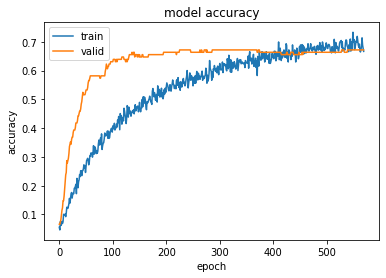

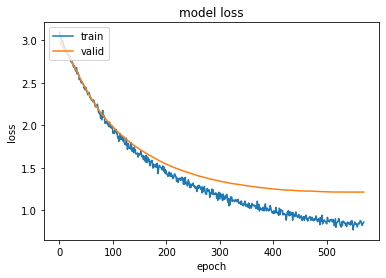

In [ ]:
# Training curves
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

In [46]:
# References
# https://future-chem.com/rdkit-google-colab/#toc5
# https://www.rdkit.org/docs/index.html